In [1]:
from sail.core import VMSetup, querydata
from sail.data import RemoteDataFrame, Utils
import time

In [2]:
#setup the communication with the remote virtual machines with digital contracts
so_path = "/Engineering/Milestone3/EndPointTools/SafeObjectEditor/KPMG/safeobjects"
dc = [{"DigitalContractGuid":"{3BFF6633-477E-43D8-B3A3-F3079A1AF10F}"}, {"DigitalContractGuid":"{34E8FF34-2D5E-41C1-ACF4-0106227D88A5}"}]
vmids, datasets, fns = VMSetup(dc, "20.185.6.111", so_path)

[P]safe objects registered
[P]login success
{"DigitalContractGuid": "{3BFF6633-477E-43D8-B3A3-F3079A1AF10F}"}


/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '20.185.6.111'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


['13.88.207.142']
{"DigitalContractGuid": "{34E8FF34-2D5E-41C1-ACF4-0106227D88A5}"}


/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '20.185.6.111'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


['13.88.207.142', '20.93.140.107']
[P]virtual machine connection to ip: 13.88.207.142 success
[P]virtual machine connection to ip: 20.93.140.107 success
[P]safe object pushed to virtual machines
[P]obtain table ids


In [3]:
#obtain virtual machines ids and dataset ids, so we can confirm the datasets are intact and ready for studying
vmids

['{63C66C42-A0D7-4F4F-BFB6-E97B2F426714}',
 '{FA97939D-04C4-4DC8-87E5-00A121068199}']

In [4]:
datasets

[{'agreement09nov': '804DD44A900818499D3FA68CDDF1C844',
  'agreementMapping': '68DA5CD6CE4D3D4F9E5A33E587B80958',
  'contact09nov': '613438CFD17362418C67F98AD9B015B2',
  'createReasonMapping': '431F1BD48F684140ADE8FB1BB5A80568',
  'payment09nov': '9C47F4F3BBE07B4F89256B1EED3C960D'},
 {'agreement09nov': 'F6C97A39723D4F478CC06371EB98103B',
  'agreementMapping': '1EE7D5340BEFBB40BB21D92CF002A7C6',
  'contact09nov': '99FC69A3BEABFB4C865F6B0D594A6173',
  'createReasonMapping': '068E2C8F14EC0241968305B80D12F65F',
  'payment09nov': '5CDB0CBA5D6D3D4E81A00524D8602448'}]

In [5]:
from sail.data import Utils
#Prepare for data to be preprocessed
u1 = Utils(vmids[0], fns)
u2 = Utils(vmids[1], fns)
u = [u1, u2]

for i in range(2):
    for key in datasets[i]:
        datasets[i][key] = u[i].read_csv(datasets[i][key])

data1 = [datasets[0]['agreement09nov'], datasets[0]['contact09nov'], datasets[0]['payment09nov'], datasets[0]['agreementMapping'], datasets[0]['createReasonMapping']]
data2 = [datasets[1]['agreement09nov'], datasets[1]['contact09nov'], datasets[1]['payment09nov'], datasets[1]['agreementMapping'], datasets[1]['createReasonMapping']]
data = [data1, data2]
#data = [data1]
data

[['{5A23038C-3511-4ACE-B645-4F565AB95400}.5C37473C6D3443F49C03CAF0D746B997',
  '{746D00A1-1541-4A1B-B4F7-E56A7A6BBC8F}.5C37473C6D3443F49C03CAF0D746B997',
  '{13A68BE7-DB42-4DAF-94C2-7C372BC3C552}.5C37473C6D3443F49C03CAF0D746B997',
  '{0B0D4EB1-A528-4658-8118-35740A1F99CD}.5C37473C6D3443F49C03CAF0D746B997',
  '{ADA30463-6B09-4202-B704-142C02BA52CF}.5C37473C6D3443F49C03CAF0D746B997'],
 ['{8258F232-7E9B-43E9-8737-DA5DEECE0DBD}.5C37473C6D3443F49C03CAF0D746B997',
  '{281880C6-5294-4EAD-99B4-0565C109B400}.5C37473C6D3443F49C03CAF0D746B997',
  '{4097C89C-421F-488D-9194-28DE38038067}.5C37473C6D3443F49C03CAF0D746B997',
  '{2B64575B-A893-4811-8A3E-96DB774A595D}.5C37473C6D3443F49C03CAF0D746B997',
  '{224A1E61-E9AE-401D-9573-B4E5B0592B08}.5C37473C6D3443F49C03CAF0D746B997']]

In [6]:
#Setup parameters for federated xgboost model
from sail.algo import fdxgb

In [7]:
model = fdxgb(vmids)

In [8]:
mid_time = time.time()

#Preprocess to raw data and obtain the final dataframe 
processed_data = model.data_preprocessv6(data)

print("TIME TAKEN:"+str(time.time() - mid_time))

TIME TAKEN:378.3979663848877


In [9]:
processed_data

[['{EE60BF3B-5E6D-46C0-A187-2EE1E3D1C46D}.22781F1189EE4A59811FC87A58F87FE1',
  '{EE60BF3B-5E6D-46C0-A187-2EE1E3D1C46D}.A25D92AC2CE3419183BA2D2DC327853E',
  '{EE60BF3B-5E6D-46C0-A187-2EE1E3D1C46D}.1D45849AE8E348AC9E0E1D327963720B',
  '{EE60BF3B-5E6D-46C0-A187-2EE1E3D1C46D}.DFF3006247B84C48B8F6566A1FBCF450',
  '{EE60BF3B-5E6D-46C0-A187-2EE1E3D1C46D}.04791A2940C246C9BFF33BD8CEAC5A4E',
  '{EE60BF3B-5E6D-46C0-A187-2EE1E3D1C46D}.E0C8C95A43FE48A980DD74EB94B50D52',
  '{EE60BF3B-5E6D-46C0-A187-2EE1E3D1C46D}.0BF4AC222C15496884B65150893F2BBA',
  '{EE60BF3B-5E6D-46C0-A187-2EE1E3D1C46D}.E87E761B37B14F8CA829CC9558A3B22E',
  '{EE60BF3B-5E6D-46C0-A187-2EE1E3D1C46D}.A532E0888F9943A3AE5CDD8EEA16A5C8',
  '{EE60BF3B-5E6D-46C0-A187-2EE1E3D1C46D}.178301F3D4C54CFF838BB97729BD0D96'],
 ['{72144788-83DA-4120-B75D-FA58626E124F}.22781F1189EE4A59811FC87A58F87FE1',
  '{72144788-83DA-4120-B75D-FA58626E124F}.A25D92AC2CE3419183BA2D2DC327853E',
  '{72144788-83DA-4120-B75D-FA58626E124F}.1D45849AE8E348AC9E0E1D327963720B'

In [10]:
#[y_val, y_test, X_val, X_test, X_train, y_train, X_train_val, y_train_val]
X_train = [processed_data[0][0],processed_data[1][0]]
y_train = [processed_data[0][1],processed_data[1][1]]
X_val = [processed_data[0][2],processed_data[1][2]]
y_val = [processed_data[0][3],processed_data[1][3]]
X_train_val = [processed_data[0][4],processed_data[1][4]]
y_train_val = [processed_data[0][5],processed_data[1][5]]
X_test = [processed_data[0][6],processed_data[1][6]]
y_test = [processed_data[0][7],processed_data[1][7]]

In [11]:
mid_time = time.time()

rdf = RemoteDataFrame(vmids[0], X_train[0], fns)
cols = rdf.columns
cols
print("TIME TAKEN:"+str(time.time() - mid_time))

TIME TAKEN:2.0031886100769043


In [12]:
import statistics
import optuna

def objective(trial, fdxgbmod, X_train, y_train, X_val, y_val):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import auc
    import numpy as np
    
    mid_time = time.time()
    
    #trial partameter values
    learning_rate = trial.suggest_uniform('learning_rate', 0, 0.1)
    max_depth = trial.suggest_int('max_depth', 5, 10, step=1)
    max_delta_step = trial.suggest_int('max_delta_step', 10, 20, step=1)
    subsample = trial.suggest_uniform('subsample', 0.5, 1)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 0.5)
    colsample_bylevel = trial.suggest_uniform('colsample_bylevel', 0.5, 1.0)
    reg_lambda = trial.suggest_int('reg_lambda', 50, 100, step=2)
    reg_alpha = trial.suggest_uniform('reg_alpha', 1e-6, 1e-5)
    gamma = trial.suggest_uniform('gamma', 1e-9, 1e-8)
    n_estimators = trial.suggest_int('n_estimators', 100, 200, step=2)
    scale_pos_weight = trial.suggest_uniform('scale_pos_weight', 5, 15)

    
    model_params = {
        "colsample_bylevel": colsample_bylevel,
        "colsample_bytree": colsample_bytree,
        "gamma": gamma,
        "learning_rate": learning_rate,
        "max_delta_step": max_delta_step,
        "max_depth": max_depth,
        "n_estimators": n_estimators,
        "reg_alpha": reg_alpha,
        "reg_lambda": reg_lambda,
        "subsample": subsample,
        "scale_pos_weight": scale_pos_weight
        }

    #train the a new model
    fdxgbmod.params =  model_params
    model_tmp = model.fit_withhash(X_train,y_train)
    
    #evaluate the model in terms of accuracy
    results =  fdxgbmod.aucpr_score(model_tmp, X_val, y_val)
    precision = results[0][0]
    recall = results[0][2]
    
    recall = np.append(recall, [1])    
    
    #calculate area under curve
    auc_precision_recall = auc(recall, precision)
    
    print("AUC:"+str(auc_precision_recall))
    print("TIME TAKEN:"+str(time.time() - mid_time))
    #return area under curve
    return auc_precision_recall

In [13]:
# xgbmodel = model.fit_withhash(X_train,y_train)
#xgbmodel = model.fit(X_train,y_train)

In [14]:
mid_time = time.time()

model.feature_num = len(cols)
study = optuna.create_study(direction="maximize")

n=3
study.optimize(lambda trial: objective(trial, model, X_train, y_train, X_val, y_val ), n_trials=n)

print(time.time() - mid_time)

[I 2021-11-28 06:33:29,151] A new study created in memory with name: no-name-a09a83a5-7b8b-44c3-9ff1-b9133e40c76d


[06:33:29] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47
Tree 48
Tree 49
Tree 50
Tree 51
Tree 52
Tree 53
Tree 54
Tree 55
Tree 56
Tree 57
Tree 58
Tree 59
Tree 60
Tree 61
Tree 62
Tree 63
Tree 64
Tree 65
Tree 66
Tree 67
Tree 68
Tree 69
Tree 70
Tree 71
Tree 72
Tree 73
Tree 74
Tree 75
Tree 76
Tree 77
Tree 78
Tree 79
Tree 80
Tree 8

[I 2021-11-28 07:16:06,825] Trial 0 finished with value: 0.4197881677241034 and parameters: {'learning_rate': 0.03823393188715621, 'max_depth': 6, 'max_delta_step': 19, 'subsample': 0.8420204183167326, 'colsample_bytree': 0.39069945835802855, 'colsample_bylevel': 0.5874007305158777, 'reg_lambda': 90, 'reg_alpha': 7.400596507711234e-06, 'gamma': 3.6556343125417354e-09, 'n_estimators': 188, 'scale_pos_weight': 5.013038412971277}. Best is trial 0 with value: 0.4197881677241034.


AUC:0.4197881677241034
TIME TAKEN:2557.6726381778717
[07:16:06] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47
Tree 48
Tree 49
Tree 50
Tree 51
Tree 52
Tree 53
Tree 54
Tree 55
Tree 56
Tree 57
Tree 58
Tree 59
Tree 60
Tree 61
Tree 62
Tree 63
Tree 64
Tree 65
Tree 66
Tree 67
Tree 68
Tree 69
Tree 70
Tree 71
Tree 72
Tree 73
Tree 74
T

[I 2021-11-28 07:40:03,116] Trial 1 finished with value: 0.9255339389600966 and parameters: {'learning_rate': 0.08502320041936406, 'max_depth': 6, 'max_delta_step': 11, 'subsample': 0.8243153863000665, 'colsample_bytree': 0.15498261427131974, 'colsample_bylevel': 0.5767484890635408, 'reg_lambda': 68, 'reg_alpha': 5.8587081944382525e-06, 'gamma': 6.954746538238729e-09, 'n_estimators': 110, 'scale_pos_weight': 7.9894942079588755}. Best is trial 1 with value: 0.9255339389600966.


AUC:0.9255339389600966
TIME TAKEN:1436.289720773697
[07:40:03] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47
Tree 48
Tree 49
Tree 50
Tree 51
Tree 52
Tree 53
Tree 54
Tree 55
Tree 56
Tree 57
Tree 58
Tree 59
Tree 60
Tree 61
Tree 62
Tree 63
Tree 64
Tree 65
Tree 66
Tree 67
Tree 68
Tree 69
Tree 70
Tree 71
Tree 72
Tree 73
Tree 74
Tr

[I 2021-11-28 08:21:33,277] Trial 2 finished with value: 0.44062589983602574 and parameters: {'learning_rate': 0.033045126242286095, 'max_depth': 5, 'max_delta_step': 13, 'subsample': 0.7641500760083224, 'colsample_bytree': 0.21208007005324592, 'colsample_bylevel': 0.8859015278420416, 'reg_lambda': 56, 'reg_alpha': 8.70898470707507e-06, 'gamma': 1.9215766647557677e-09, 'n_estimators': 182, 'scale_pos_weight': 14.398837331294374}. Best is trial 1 with value: 0.9255339389600966.


AUC:0.44062589983602574
TIME TAKEN:2490.159247636795
6484.127410650253


In [15]:
best_params = study.best_params
best_score = study.best_value
print(f"Best score: {best_score}\n")
print(f"Optimized parameters: {best_params}\n")

Best score: 0.9255339389600966

Optimized parameters: {'learning_rate': 0.08502320041936406, 'max_depth': 6, 'max_delta_step': 11, 'subsample': 0.8243153863000665, 'colsample_bytree': 0.15498261427131974, 'colsample_bylevel': 0.5767484890635408, 'reg_lambda': 68, 'reg_alpha': 5.8587081944382525e-06, 'gamma': 6.954746538238729e-09, 'n_estimators': 110, 'scale_pos_weight': 7.9894942079588755}



<ipython-input-21-ac243543a9b5>:1: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)


array([<AxesSubplot:xlabel='colsample_bylevel', ylabel='Objective Value'>,
       <AxesSubplot:xlabel='colsample_bytree'>,
       <AxesSubplot:xlabel='gamma'>, <AxesSubplot:xlabel='learning_rate'>,
       <AxesSubplot:xlabel='max_delta_step'>,
       <AxesSubplot:xlabel='max_depth'>,
       <AxesSubplot:xlabel='n_estimators'>,
       <AxesSubplot:xlabel='reg_alpha'>,
       <AxesSubplot:xlabel='reg_lambda'>,
       <AxesSubplot:xlabel='scale_pos_weight'>,
       <AxesSubplot:xlabel='subsample'>], dtype=object)

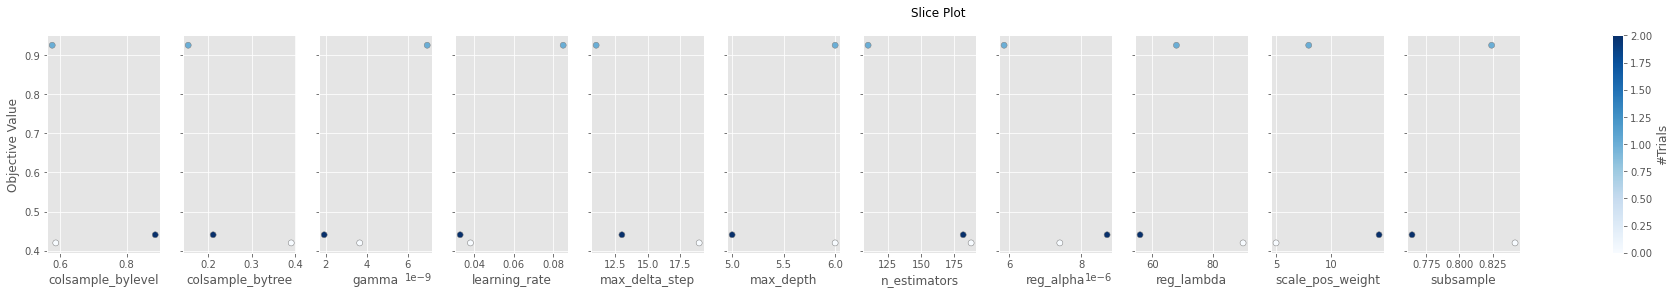

In [21]:
optuna.visualization.matplotlib.plot_slice(study)

<ipython-input-22-93837a46823f>:1: ExperimentalWarning: plot_edf is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_edf([study])


<AxesSubplot:title={'center':'Empirical Distribution Function Plot'}, xlabel='Objective Value', ylabel='Cumulative Probability'>

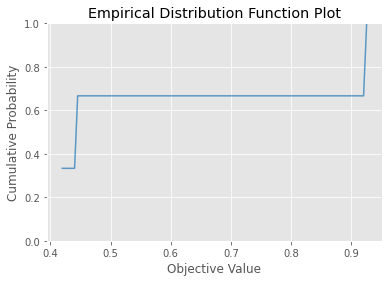

In [22]:
optuna.visualization.matplotlib.plot_edf([study])

<ipython-input-24-471f79a759ba>:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


<AxesSubplot:title={'center':'Optimization History Plot'}, xlabel='#Trials', ylabel='Objective Value'>

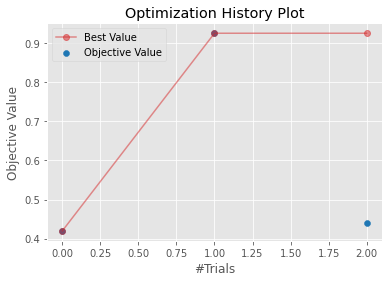

In [24]:
optuna.visualization.matplotlib.plot_optimization_history(study)

<ipython-input-25-a5c7740d20da>:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


<AxesSubplot:title={'center':'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

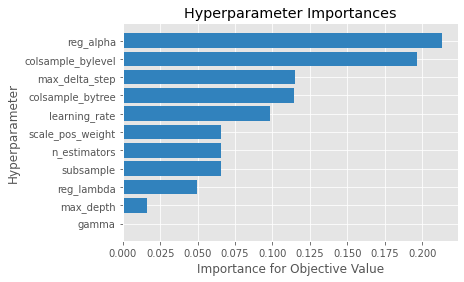

In [25]:
optuna.visualization.matplotlib.plot_param_importances(study)